In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('cancer_reg.csv')
df2=pd.read_csv

In [3]:
df1.isnull().sum()*100/df1.shape[0]

avganncount                 0.000000
avgdeathsperyear            0.000000
target_deathrate            0.000000
incidencerate               0.000000
medincome                   0.000000
popest2015                  0.000000
povertypercent              0.000000
studypercap                 0.000000
binnedinc                   0.000000
medianage                   0.000000
medianagemale               0.000000
medianagefemale             0.000000
geography                   0.000000
percentmarried              0.000000
pctnohs18_24                0.000000
pcths18_24                  0.000000
pctsomecol18_24            74.991795
pctbachdeg18_24             0.000000
pcths25_over                0.000000
pctbachdeg25_over           0.000000
pctemployed16_over          4.988513
pctunemployed16_over        0.000000
pctprivatecoverage          0.000000
pctprivatecoveragealone    19.986872
pctempprivcoverage          0.000000
pctpubliccoverage           0.000000
pctpubliccoveragealone      0.000000
p

In [4]:
df1.drop('pctsomecol18_24',axis=1,inplace=True)

In [5]:
df1['pctemployed16_over'].fillna(value=df1['pctemployed16_over'].median(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_6720\14041269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['pctemployed16_over'].fillna(value=df1['pctemployed16_over'].median(),inplace=True)


In [6]:
df1[df1.duplicated()]

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate


In [7]:
df1['pctemployed16_over'].median()

54.5

In [8]:
cat=[]
num=[]
for i in df1.columns:
    if df1[i].nunique()<10:
        print(i,df1[i].nunique(),df1[i].unique())
        cat.append(i)
    else:
        num.append(i)

In [9]:
df1

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


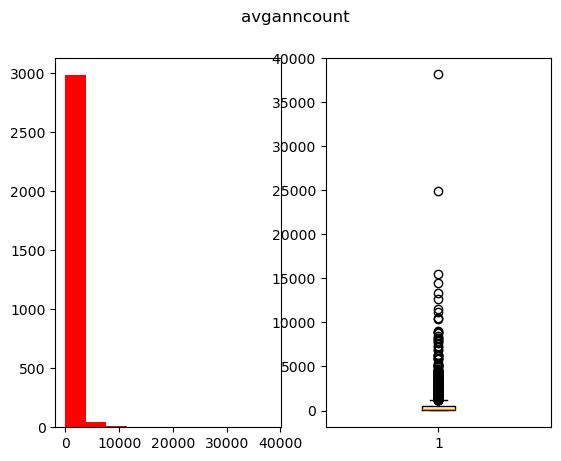

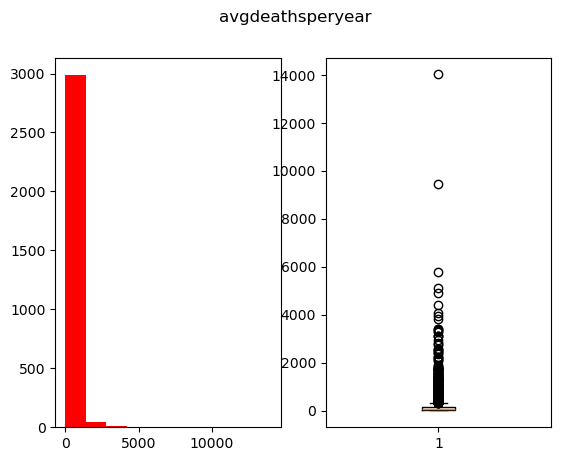

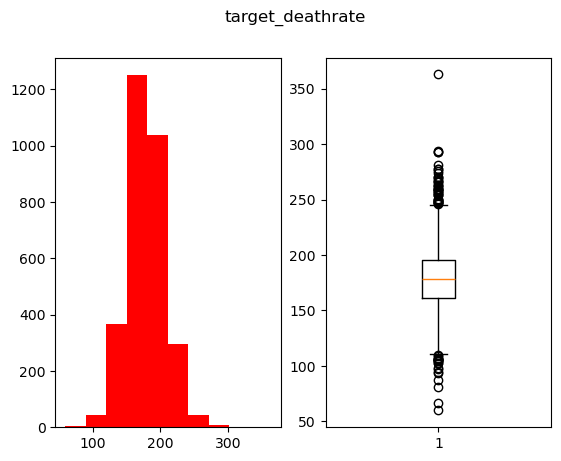

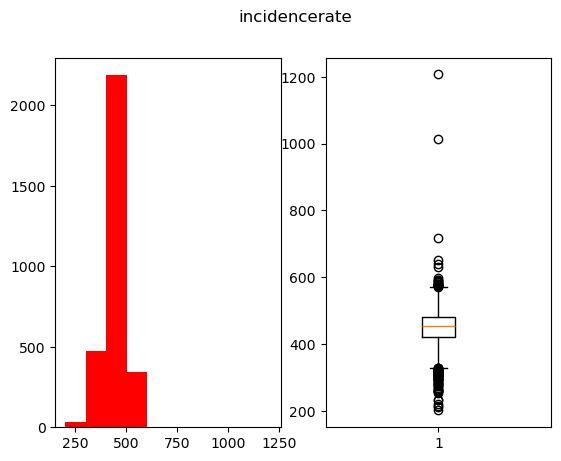

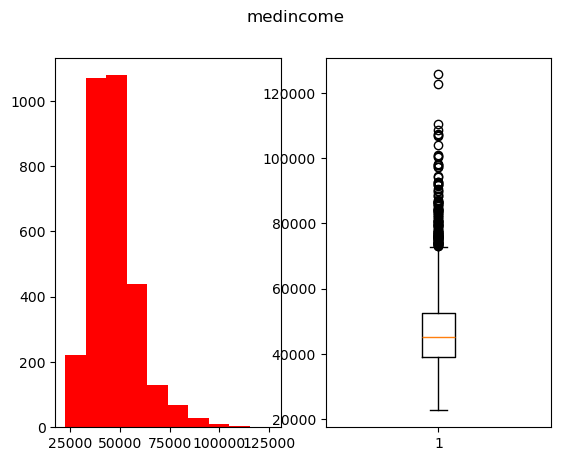

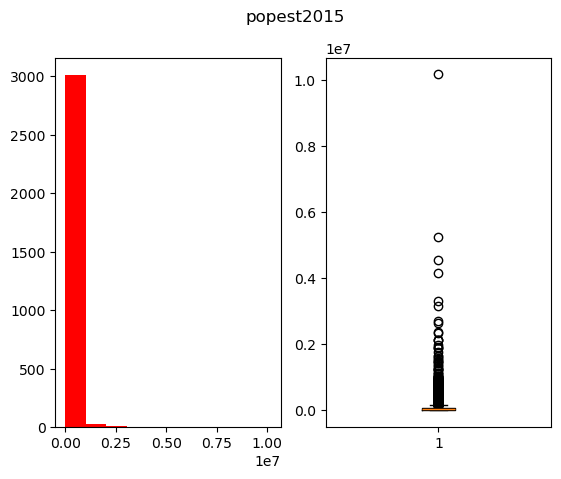

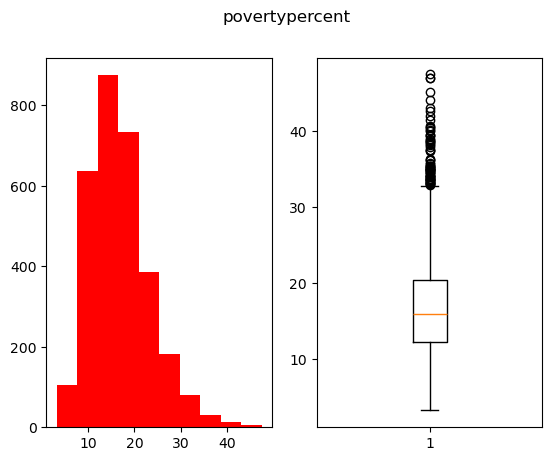

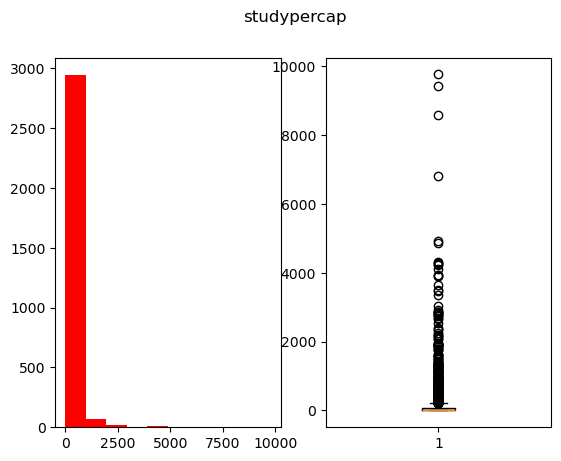

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

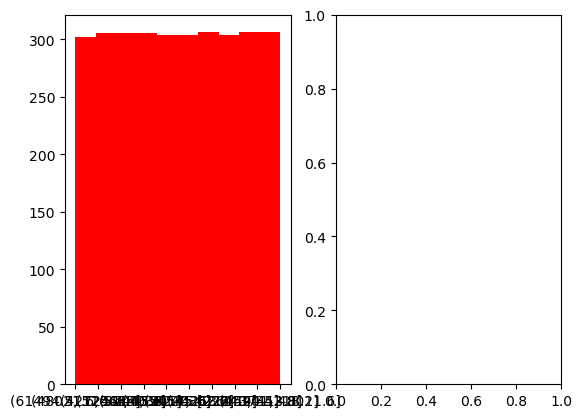

In [10]:
 for i in num:
    fig, ax=plt.subplots(1,2)
    ax[0].hist(df1[i],color='r')
    ax[1].boxplot(df1[i])
    plt.suptitle(i)
    plt.show()

In [ ]:
df1.drop('geography',axis=1,inplace=True)

In [ ]:
df1

In [ ]:
for i in num:
    q1=df1[i].quantile(0.25)
    q3=df1[i].quantile(0.75)
    iqr=q3-q1
    lf=q1-(1.5*iqr)
    uf=q3+(1.5*iqr)
    df1.loc[df1[i]<lf,i]=lf
    df1.loc[df1[i]>uf,i]=uf

In [ ]:
X_df=df1.drop('avgdeathsperyear',axis=1)
y=df1['avgdeathsperyear']

In [ ]:
X_df
y

In [ ]:
X=X_df.values
Y=y.values


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

In [ ]:
y_train_pred=lr_model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mse_t=mean_squared_error(y_train_pred,y_train)
rmse_t=mse_t**0.5
mae_t=mean_absolute_error(y_train_pred,y_train)
r2_train=r2_score(y_train,y_train_pred)
print(mse_t)
print(rmse_t)
print(mae_t)
print(r2_train)

In [ ]:
y_test_pred=lr_model.predict(X_test)

In [ ]:
mse_test=mean_squared_error(y_test_pred,y_test)
rmse_test=mse_test**0.5
mae_test=mean_absolute_error(y_test_pred,y_test)
r2_test=r2_score(y_test,y_test_pred)
print(mse_test)
print(rmse_test)
print(mae_test)
print(r2_test)